In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

<AxesSubplot:>

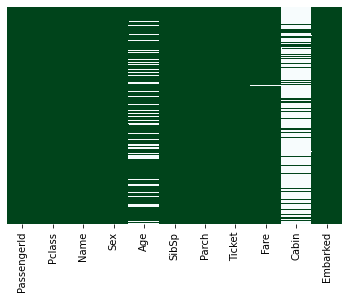

In [6]:
sns.heatmap(test.isnull(),yticklabels=False,cmap='BuGn_r',cbar=False)
# isnull() method stores True for ever NaN(Not a Number) value and False for a Not null value, and just the columns that have a false value will show up in the plot.
# notnull() method do the opposite work of isnull() method.

### As you can see, we have two columns missing here Age and Cabin but Cabin is missed a lot, so we'll probably drot it later.

In [7]:
# Or we can see it in this way:
total = train.isnull().sum().sort_values(ascending=False)
total

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

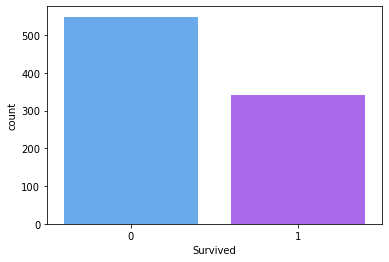

In [8]:
# Now, let's draw some plots to see the most important columns:
sns.countplot(x='Survived',data=train,palette='cool')

<AxesSubplot:xlabel='Survived', ylabel='count'>

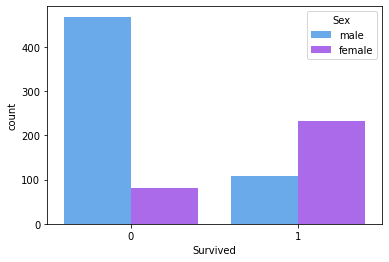

In [9]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='cool')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

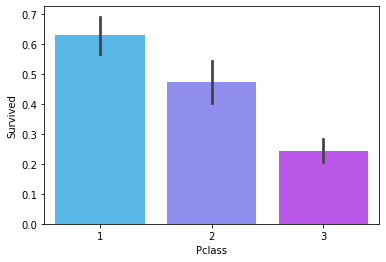

In [10]:
sns.barplot(x='Pclass', y='Survived', data=train, palette='cool')

### We can see clearly that Pclass is contributing to passengers chance of survival, especially if this person is in class 1

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

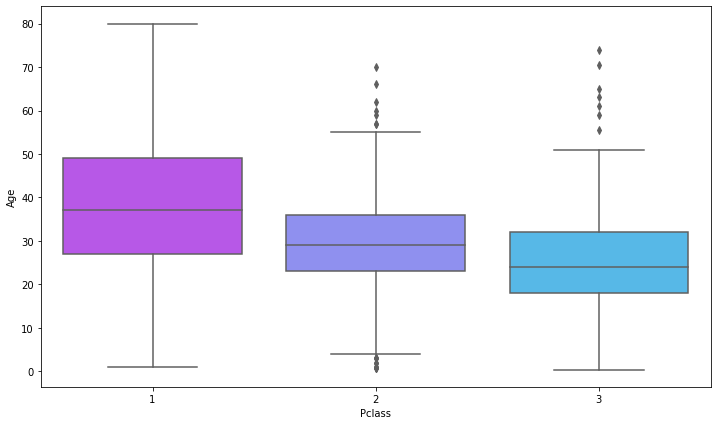

In [11]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='cool_r')

### This shows the average age of people belonging to different class in the ship. 
### We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We’ll use these average age values to fill in the missed values of Age by the mean age of all the passengers (which we called imputation) instead of just dropping the missing age data rows.

In [12]:
# Now let's define our imputation functions.
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [13]:
# And now, let's apply it.
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)
# We choose axis=1 because we want our function to act on rows.
#train["Age"] = train["Age"].astype(int) // If we want to convert this column to int.

<AxesSubplot:>

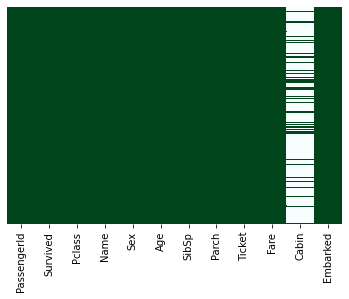

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='BuGn_r',cbar=False)

<AxesSubplot:>

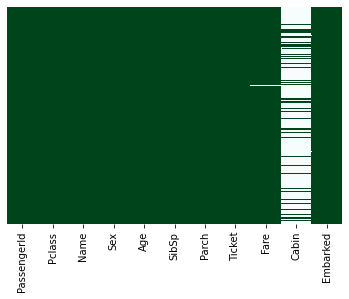

In [15]:
sns.heatmap(test.isnull(),yticklabels=False,cmap='BuGn_r',cbar=False)

Text(0.5, 1.0, 'Male')

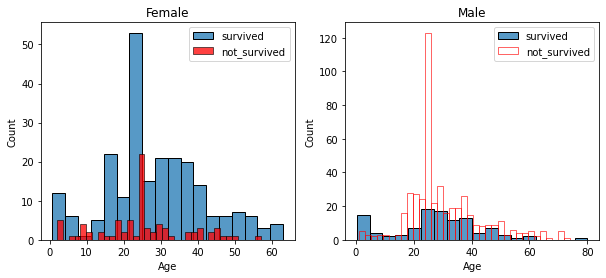

In [35]:
# Now let's show the number of survived passengers by Sex and Age:

women = train[train['Sex']=='female']
men = train[train['Sex']=='male']

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4)) # To display two plots side-by-side

ax = sns.histplot(women[women['Survived']==1].Age, bins=18, label = 'survived', ax = axes[0])
ax = sns.histplot(women[women['Survived']==0].Age, bins=35, label = 'not_survived', ax = axes[0], color='r')
ax.legend()
ax.set_title('Female')

ax = sns.histplot(men[men['Survived']==1].Age, bins=18, label = 'survived', ax = axes[1])
ax = sns.histplot(men[men['Survived']==0].Age, bins=35, label = 'not_survived', ax = axes[1], color='r', fill=False)
ax.legend()
ax.set_title('Male')

In [17]:
# And, now let's go ahead and drop the Cabin column and and the row in Fare that is NaN:
train.drop('Cabin',axis='columns',inplace=True) 
# axis= means the columns axis and when inplace=True is passed, the operation occurs in place so we don't have to add an assignment statement.
test.drop('Cabin',axis='columns',inplace=True)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
test.dropna(inplace=True)

<AxesSubplot:>

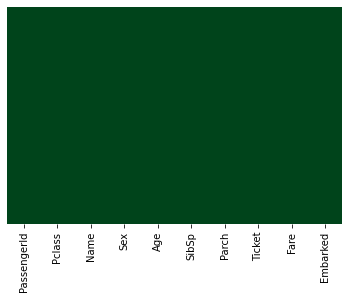

In [20]:
sns.heatmap(test.isnull(),yticklabels=False,cmap='BuGn_r',cbar=False)

In [21]:
# And finally let's deal we the two raws missed in the Embarked column:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [22]:
# As you can see, the most commun value in this column is S, so let's fill the two missed raws by this value:
train['Embarked'] = train['Embarked'].fillna('S')

In [23]:
total = train.isnull().sum().sort_values(ascending=False)
total

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [27]:
# As we can see, there are 4 categorical columns namely Name, Sex, Ticket and Embarked (which they have an Object type).
sex = pd.get_dummies(train['Sex'],drop_first=True) 
# We have used the parameter drop_first=True to delete the female column because we don't need it, we can refer the passenger sex with only male column.
# Or we can use this method:
# genders = {"male": 0, "female": 1}
# data = [train, test]

# for dataset in data:
#     dataset['Sex'] = dataset['Sex'].map(genders)

embark = pd.get_dummies(train['Embarked'],drop_first=True)
# We have also in this column three classes C, Q and S so we can drop the first one and if we have 0 in the other two columns, we can refer that C is 
# right class.

#Now, we can drop them all (Name and Ticket don't have any relation with a high survival rate, so we can just droping them):
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

#And then, concatenate them with our train dataset:
train = pd.concat([train,sex,embark],axis=1)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'], test_size=0.33,random_state=101) 
# or we can use train_size=0.67 instead of test_size=0.33

## Common split percentages include:

+ Train: 80%, Test: 20%
+ Train: 67%, Test: 33%
+ Train: 50%, Test: 50%

## The purpose of random_state parameter:
When comparing machine learning algorithms, it is desirable that they are fit and evaluated on the same subsets of the dataset. This can be achieved 
by fixing the seed for the pseudo-random number generator “random_state” used when splitting the dataset to an integer value. So when other developers try split the dataset with the same seed, they will have the same subsets of the dataset.

## The purpose of using train_test_split function:
We have already our test dataset but without Survived column, so if we want to compute the model accuracy, we should split our train dataset to another train and test datasets to test our model on this new test dataset generated by this function.

In [30]:
#And now, let's train our model
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

#Great, now, let's predict the survived passengers on the test dataset and assign them to predictions variable:
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\Users\anas_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
#Finally, let's see how robust is our model by calculating the accuracy:
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

print(classification_report(y_test,predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       169
           1       0.80      0.64      0.71       126

    accuracy                           0.78       295
   macro avg       0.79      0.76      0.77       295
weighted avg       0.78      0.78      0.78       295

Accuracy: 0.7796610169491526


## Well, we got a classification rate of 77% which is considered as a good accuracy.

In [32]:
#The code below perform K-Fold Cross Validation on our Logistic Regression model, using 10 folds (K = 10). 
#Therefore it outputs an array with 10 different scores.
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

C:\Users\anas_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anas_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Scores: [0.8        0.81666667 0.7        0.88333333 0.73333333 0.81666667
 0.86440678 0.77966102 0.72881356 0.83050847]
Mean: 0.7953389830508474
Standard Deviation: 0.056821982990437434


C:\Users\anas_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anas_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [34]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(lr, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

C:\Users\anas_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anas_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([[333,  47],
       [ 82, 134]], dtype=int64)

The confusion matrix is just a tally to tell you what your model got right and what it got wrong. Furthermore, we have the actual values across the rows and the model's predicted values in the columns.(To find the correct observations, just take a look at the diagnol)
In our case, 
+ the first row represents the not-survived-predictions: 333 passengers were correctly classified as not survived (called **true negatives**) and 47 where wrongly classified as not survived (**false positives**).
+ The second row is about the survived-predictions: 82 passengers where wrongly classified as survived (**false negatives**) and 134 where correctly classified as survived (**true positives**).

The word positive and negative goes along with what your model predicted.

==> It's called the confusion matrix because you can see what your model is confused about.

In [60]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))

Precision: 0.801980198019802
Recall: 0.6428571428571429


Our model predicts 80% of passengers survival correctly (precision). The recall tells us that it predicts the survival of 64 % of the people who actually survived.

In [36]:
# We can also combine precision and recall into one score, which is called the F-score. 
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.6750629722921914